# **APPROACH - 2 (Neural networks)**

In [3]:
import torch
import matplotlib.pyplot as plt

In [4]:
words = open('names.txt', 'r').read().splitlines()

In [5]:
lst = ['.'] + sorted(list(set(''.join(words))))

In [6]:
# training set for the bigrams(x,y)

xs, ys = [], []

for w in words[:2]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs,chs[1:]):
    bigram = (ch1,ch2)
    print(f'bigram => {bigram}')
    xs.append(lst.index(ch1))
    ys.append(lst.index(ch2))

xs = torch.tensor(xs)
ys = torch.tensor(ys)

print(f'xs => {xs}\nys => {ys}')

bigram => ('.', 'e')
bigram => ('e', 'm')
bigram => ('m', 'm')
bigram => ('m', 'a')
bigram => ('a', '.')
bigram => ('.', 'o')
bigram => ('o', 'l')
bigram => ('l', 'i')
bigram => ('i', 'v')
bigram => ('v', 'i')
bigram => ('i', 'a')
bigram => ('a', '.')
xs => tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1])
ys => tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0])


**So from the above**

* When we have 5, then the prob of 13 should be higher
* When we have 13, then the prob of 1 should be higher
* When we have 0, then the prob of 15 should be higher

### **Now to construct the neural net, we do not want to give the integer as the input, hence we use one hot encoding here**

In [7]:
import torch.nn.functional as F

xenc = F.one_hot(xs, num_classes = 27)
xenc

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
         0, 0, 0],


In [8]:
xenc.shape # 12 words each with 27 len encoding

torch.Size([12, 27])

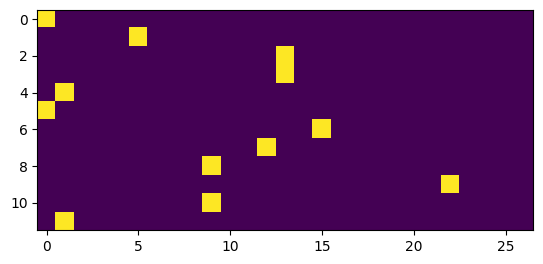

In [9]:
plt.imshow(xenc)

In [10]:
xenc.dtype

torch.int64

In [11]:
xenc = xenc.float()
xenc.dtype

torch.float32

### **wx + b**

In [12]:
W = torch.randn((27,1)) # weights for each of the 27 inputs
xenc @ W

tensor([[-1.7922],
        [ 1.1890],
        [ 1.2677],
        [ 1.2677],
        [-1.6864],
        [-1.7922],
        [ 2.0186],
        [-0.1836],
        [ 0.1481],
        [ 1.7487],
        [ 0.1481],
        [-1.6864]])

In [13]:
(xenc @ W).shape      # 12 x 27   27 x 1

torch.Size([12, 1])

In [14]:
W = torch.randn((27,27)) # weights for each of the 27 inputs
xenc @ W

tensor([[ 0.4273,  0.7577, -0.4735,  2.5999, -0.9523,  0.3842,  0.4256, -0.7516,
         -0.1715, -0.4516,  0.0844,  2.0764,  1.7518, -0.1073, -1.0219, -0.7053,
          0.0298,  0.0879,  0.8379,  1.8357, -1.6790, -0.3657,  0.3723,  2.8612,
          1.0607, -0.2642, -0.4960],
        [ 1.9636,  1.0438,  0.6321, -0.1837, -1.0217,  0.8304, -1.2884, -0.0252,
         -0.7813,  0.0837, -0.0693, -0.6243, -1.8408, -0.0358,  0.3546, -0.2751,
          1.7959,  0.1627,  1.3015,  0.1567, -0.3212, -0.1348,  0.3621,  0.8569,
          0.0631, -0.4971,  0.5086],
        [ 0.7446, -0.5384, -0.2875, -1.0362, -1.4818,  0.6160, -0.5119,  0.2296,
          1.6361, -0.3685,  0.0604, -1.4046, -0.3637, -0.8514,  0.0270,  0.6824,
          0.2350,  0.4349,  0.8995,  0.0093,  1.9709,  0.0826, -1.4398,  1.6603,
          0.4670,  0.6454,  1.0387],
        [ 0.7446, -0.5384, -0.2875, -1.0362, -1.4818,  0.6160, -0.5119,  0.2296,
          1.6361, -0.3685,  0.0604, -1.4046, -0.3637, -0.8514,  0.0270,  0.6824

In [15]:
(xenc @ W).shape      # 12 x 27   27 x 27

torch.Size([12, 27])

In [16]:
# Firing rate of the neuron
(xenc @ W)[3, 13]

tensor(-0.8514)

### We will interpret the above xenc @ W as log counts and we need count from the above (exp()) => softmax( )

In [17]:
logits = (xenc @ W)
logits = logits.exp()
logits
# everything became positive

tensor([[ 1.5331,  2.1334,  0.6228, 13.4624,  0.3858,  1.4684,  1.5305,  0.4716,
          0.8424,  0.6366,  1.0881,  7.9758,  5.7651,  0.8982,  0.3599,  0.4940,
          1.0302,  1.0919,  2.3114,  6.2693,  0.1866,  0.6937,  1.4511, 17.4824,
          2.8883,  0.7678,  0.6090],
        [ 7.1249,  2.8400,  1.8816,  0.8321,  0.3600,  2.2943,  0.2757,  0.9751,
          0.4578,  1.0873,  0.9330,  0.5357,  0.1587,  0.9648,  1.4256,  0.7595,
          6.0251,  1.1767,  3.6748,  1.1696,  0.7253,  0.8739,  1.4364,  2.3559,
          1.0651,  0.6083,  1.6629],
        [ 2.1055,  0.5837,  0.7501,  0.3548,  0.2272,  1.8516,  0.5994,  1.2581,
          5.1351,  0.6918,  1.0622,  0.2455,  0.6951,  0.4268,  1.0273,  1.9786,
          1.2649,  1.5448,  2.4583,  1.0093,  7.1769,  1.0861,  0.2370,  5.2608,
          1.5952,  1.9068,  2.8255],
        [ 2.1055,  0.5837,  0.7501,  0.3548,  0.2272,  1.8516,  0.5994,  1.2581,
          5.1351,  0.6918,  1.0622,  0.2455,  0.6951,  0.4268,  1.0273,  1.9786

In [18]:
prob = logits / logits.sum(dim = 1, keepdim = True)       #   Softmax function
prob

tensor([[0.0206, 0.0287, 0.0084, 0.1808, 0.0052, 0.0197, 0.0206, 0.0063, 0.0113,
         0.0086, 0.0146, 0.1071, 0.0774, 0.0121, 0.0048, 0.0066, 0.0138, 0.0147,
         0.0310, 0.0842, 0.0025, 0.0093, 0.0195, 0.2348, 0.0388, 0.0103, 0.0082],
        [0.1631, 0.0650, 0.0431, 0.0191, 0.0082, 0.0525, 0.0063, 0.0223, 0.0105,
         0.0249, 0.0214, 0.0123, 0.0036, 0.0221, 0.0326, 0.0174, 0.1379, 0.0269,
         0.0841, 0.0268, 0.0166, 0.0200, 0.0329, 0.0539, 0.0244, 0.0139, 0.0381],
        [0.0464, 0.0129, 0.0165, 0.0078, 0.0050, 0.0408, 0.0132, 0.0277, 0.1132,
         0.0153, 0.0234, 0.0054, 0.0153, 0.0094, 0.0226, 0.0436, 0.0279, 0.0341,
         0.0542, 0.0223, 0.1582, 0.0239, 0.0052, 0.1160, 0.0352, 0.0420, 0.0623],
        [0.0464, 0.0129, 0.0165, 0.0078, 0.0050, 0.0408, 0.0132, 0.0277, 0.1132,
         0.0153, 0.0234, 0.0054, 0.0153, 0.0094, 0.0226, 0.0436, 0.0279, 0.0341,
         0.0542, 0.0223, 0.1582, 0.0239, 0.0052, 0.1160, 0.0352, 0.0420, 0.0623],
        [0.0412, 0.0019,

In [19]:
prob[0].sum()

tensor(1.)

In [20]:
prob.shape

torch.Size([12, 27])

**Everything above is differentiable**

In [21]:
### SUMMARY ---------------------------------------------------


## **STEPS**
*   Build the training set with xs and ys
*   Initialize the weights for the neural net (no bias as it is a very simple network)
*   One hot encode the input vectors
*   then perform W * x
*   Perform softmax and get the output





In [22]:
print(f'xs => {xs}\nys => {ys}')

xs => tensor([ 0,  5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1])
ys => tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0])


In [23]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g)

In [24]:
xenc = F.one_hot(xs, num_classes = 27).float() # input to the network : one-hot encoding
logits = (xenc @ W) # predict log counts
logits = logits.exp() # counts
prob = logits / logits.sum(dim = 1, keepdim = True) # softmax

In [25]:
prob.shape


torch.Size([12, 27])

In [26]:
nlls = torch.zeros(5)

for i in range(5):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {lst[x]} -> {lst[y]}')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', prob[i])
  print('label (actual next character):', y)
  p = prob[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll
  print('')

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())


--------
bigram example 1: . -> e
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.01228625513613224
log likelihood: -4.399273872375488
negative log likelihood: 4.399273872375488

--------
bigram example 2: e -> m
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character: 0.018050700426101685
l

### In the above, we have a bad loss and one reason for it is the initial weights are completely random

Now we will correct it by using a gradient descend setup

In [27]:
# randomly assigning the weights
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad = True)

In [28]:
# forward pass
xenc = F.one_hot(xs, num_classes = 27).float() # input to the network : one-hot encoding
logits = (xenc @ W) # predict log counts
logits = logits.exp() # counts
probs = logits / logits.sum(dim = 1, keepdim = True) # softmax

In [29]:
torch.arange(5)

tensor([0, 1, 2, 3, 4])

In [30]:
probs[torch.arange(12), ys]

tensor([0.0123, 0.0181, 0.0267, 0.0737, 0.0150, 0.2378, 0.0526, 0.0135, 0.0367,
        0.1056, 0.1059, 0.0150], grad_fn=<IndexBackward0>)

In [31]:
# loss
loss = -probs[torch.arange(12), ys].log().mean()
loss

tensor(3.2944, grad_fn=<NegBackward0>)

In [32]:
# backward pass
W.grad = None # zero gradient
loss.backward()

In [33]:
W.grad.shape

torch.Size([27, 27])

In [34]:
# update the weights
W.data += -0.1 * W.grad

In [35]:
print(loss.item())

3.29435658454895


## **Combining all**

In [36]:
xs,ys = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs,chs[1:]):
    xs.append(lst.index(ch1))
    ys.append(lst.index(ch2))

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

print(f'number of samples : {num}')



number of samples : 228146


In [37]:
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27,27), generator = g, requires_grad = True)

for epoch in range(101):
  # forward pass
  xenc = F.one_hot(xs, num_classes = 27).float() # input to the network : one-hot encoding
  logits = (xenc @ W) # predict log counts
  logits = logits.exp() # counts
  probs = logits / logits.sum(dim = 1, keepdim = True) # softmax

  # loss
  loss = -probs[torch.arange(num), ys].log().mean()
  if epoch % 10 == 0:
    print(f'Loss at epoch {epoch} : {loss.item() : .4f}')

  # backward pass
  W.grad = None  # zero gradient
  loss.backward()

  # update the weights
  W.data += -50 * W.grad

Loss at epoch 0 :  3.7590
Loss at epoch 10 :  2.6890
Loss at epoch 20 :  2.5728
Loss at epoch 30 :  2.5302
Loss at epoch 40 :  2.5087
Loss at epoch 50 :  2.4961
Loss at epoch 60 :  2.4880
Loss at epoch 70 :  2.4824
Loss at epoch 80 :  2.4783
Loss at epoch 90 :  2.4751
Loss at epoch 100 :  2.4727


In [38]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):

  out = []
  ix = 0
  while True:

    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------

    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(lst[ix])
    if ix == 0:
      break
  print(''.join(out))

junide.
janasah.
p.
cfay.
a.


## **The loss above is 2.47 is still the same as without a neural network for a bigram modelling**

### But the neural net is more flexible and scalable compared to the manual work